In [81]:
import pandas as pd
import sqlite3
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Connect to the database
conn = sqlite3.connect('../data/climate.db')

# Load the datasets
climate_disasters = pd.read_sql_query("SELECT * FROM climate_disaster_freq", conn)
inform_risk = pd.read_sql_query("SELECT * FROM climate_inform_risk", conn)

conn.close()

Top 5 Most Affected Countries

Top 5 Most Affected Countries:
Country
USA            231.0
China          210.0
India          141.0
Indonesia      122.0
Philippines     99.0
dtype: float64


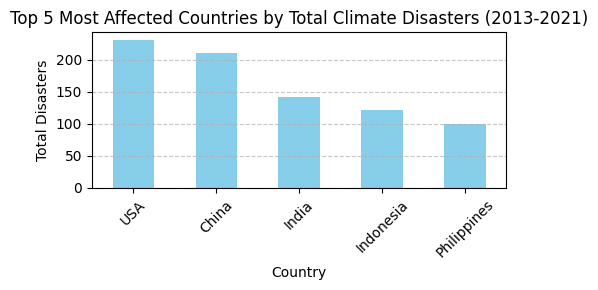

In [41]:
total_disasters_data = climate_disasters[climate_disasters['Indicator'] == 'TOTAL']

# Sum the occurrences of total disasters by country
total_disasters_per_country = total_disasters_data.groupby('Country').sum(numeric_only=True).loc[:, '2013':'2021'].sum(axis=1)

# Sort and get the top 5 countries

top_5_countries = total_disasters_per_country.sort_values(ascending=False).head(5)
print("Top 5 Most Affected Countries:")
print(top_5_countries)
plt.figure(figsize=(5, 3))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Affected Countries by Total Climate Disasters (2013-2021)')
plt.xlabel('Country')
plt.ylabel('Total Disasters')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

Top 5 Most Frequent Disaster Types

Top 5 Most Frequent Disaster Types:
           Disaster  Total
              Flood 1476.0
              Storm  967.0
          Landslide  152.0
            Drought  142.0
Extreme temperature  120.0


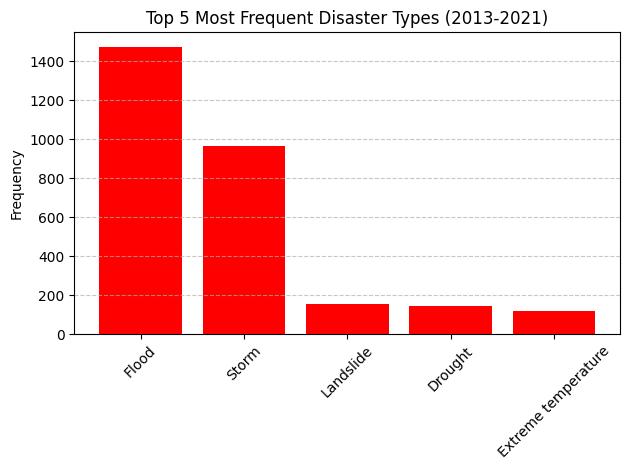

In [51]:
# Filter out 'TOTAL' indicator
total_disasters_data = climate_disasters[climate_disasters['Indicator'] != 'TOTAL']

# Sum the occurrences of each disaster type
total_disasters_per_type = total_disasters_data.groupby('Indicator').sum(numeric_only=True).loc[:, '2013':'2021'].sum(axis=1)

# Create a DataFrame with a 'years' column
top_5_disaster_types = total_disasters_per_type.sort_values(ascending=False).head(5).reset_index()
top_5_disaster_types.columns = ['Disaster', 'Total']

print("Top 5 Most Frequent Disaster Types:")

print(top_5_disaster_types.to_string(index=False))

plt.bar(top_5_disaster_types['Disaster'], top_5_disaster_types['Total'], color='red')

plt.title('Top 5 Most Frequent Disaster Types (2013-2021)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

Total Number of Disasters per Year in each country

In [24]:
total_disasters_data = climate_disasters[climate_disasters['Indicator'] != 'TOTAL']
# Calculate yearly average occurrences for each disaster type
yearly_avg_disasters = total_disasters_data.groupby('Indicator').sum(numeric_only=True).loc[:, '2013':'2021']
print("Yearly Disasters per Year:")
print(yearly_avg_disasters)

Yearly Disasters per Year:
                      2013   2014   2015   2016   2017   2018   2019   2020  \
Indicator                                                                     
Drought                9.0   20.0   27.0   14.0   12.0   17.0   15.0   12.0   
Extreme temperature   13.0   17.0   12.0   12.0   10.0   27.0   21.0    5.0   
Flood                148.0  136.0  161.0  159.0  127.0  127.0  195.0  201.0   
Landslide             11.0   15.0   20.0   13.0   25.0   12.0   25.0   19.0   
Storm                105.0   98.0  121.0   86.0  126.0   94.0   91.0  127.0   
Wildfire              10.0    4.0   13.0   10.0   15.0   10.0   14.0    9.0   

                      2021  
Indicator                   
Drought               16.0  
Extreme temperature    3.0  
Flood                222.0  
Landslide             12.0  
Storm                119.0  
Wildfire              19.0  


Year with the Most Disasters

   Year  Disasters
0  2013      296.0
1  2014      290.0
2  2015      354.0
3  2016      294.0
4  2017      315.0
5  2018      287.0
6  2019      361.0
7  2020      373.0
8  2021      391.0
Year with the Most Disasters: 2021 with 391.0 disasters


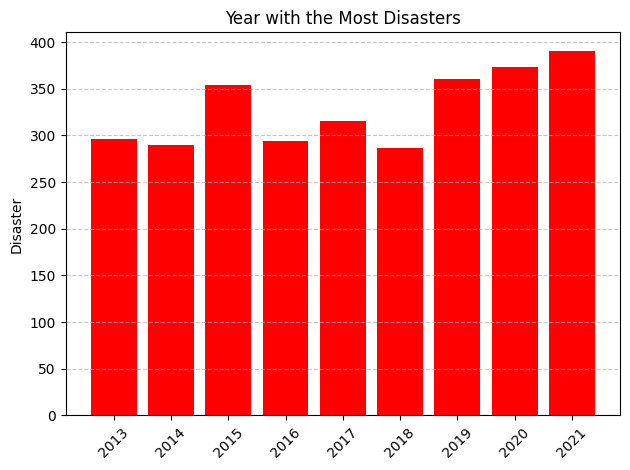

In [55]:
total_disasters_data = climate_disasters[climate_disasters['Indicator'] != 'TOTAL']
total_disasters_per_year = total_disasters_data.loc[:, '2013':'2021'].sum()

# Convert Series to DataFrame and reset index
total_disasters_per_year = total_disasters_per_year.reset_index()

# Rename columns
total_disasters_per_year.columns = ['Year', 'Disasters']

print(total_disasters_per_year)

year_with_most_disasters = total_disasters_per_year.loc[total_disasters_per_year['Disasters'].idxmax(), 'Year']
print(f"Year with the Most Disasters: {year_with_most_disasters} with {total_disasters_per_year['Disasters'].max()} disasters")

plt.bar(total_disasters_per_year['Year'], total_disasters_per_year['Disasters'], color='red')

plt.title('Year with the Most Disasters')
plt.ylabel('Disaster')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

Average Climate Disaster Per Country

In [48]:
avg_climate_disaster = climate_disasters[climate_disasters['Indicator'] == 'TOTAL']

# Melt the DataFrame to have 'Year' as a variable
avg_melted = avg_climate_disaster.melt(id_vars=['ISO3'], 
                               value_vars=['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], 
                               var_name='Year', value_name='TOTAL')


# Convert 'Year' to integer
avg_melted['Year'] = avg_melted['Year'].astype(int)

# Group by 'Country' and calculate the mean number of storms from 2013 to 2021
average_dis_per_country = avg_melted.groupby('ISO3')['TOTAL'].mean().reset_index()

# Rename the columns for clarity
average_dis_per_country.columns = ['ISO3', 'Total_Disasters']

# Print the results
print(average_dis_per_country)


    ISO3  Total_Disasters
0    AFG         5.000000
1    AGO         2.375000
2    AIA         1.000000
3    ALB         1.600000
4    ANT              NaN
..   ...              ...
210  WSM         1.000000
211  YEM         2.250000
212  ZAF         2.875000
213  ZMB         1.600000
214  ZWE         1.714286

[215 rows x 2 columns]


C:\Users\BTC\AppData\Local\Temp\ipykernel_15468\4264786015.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


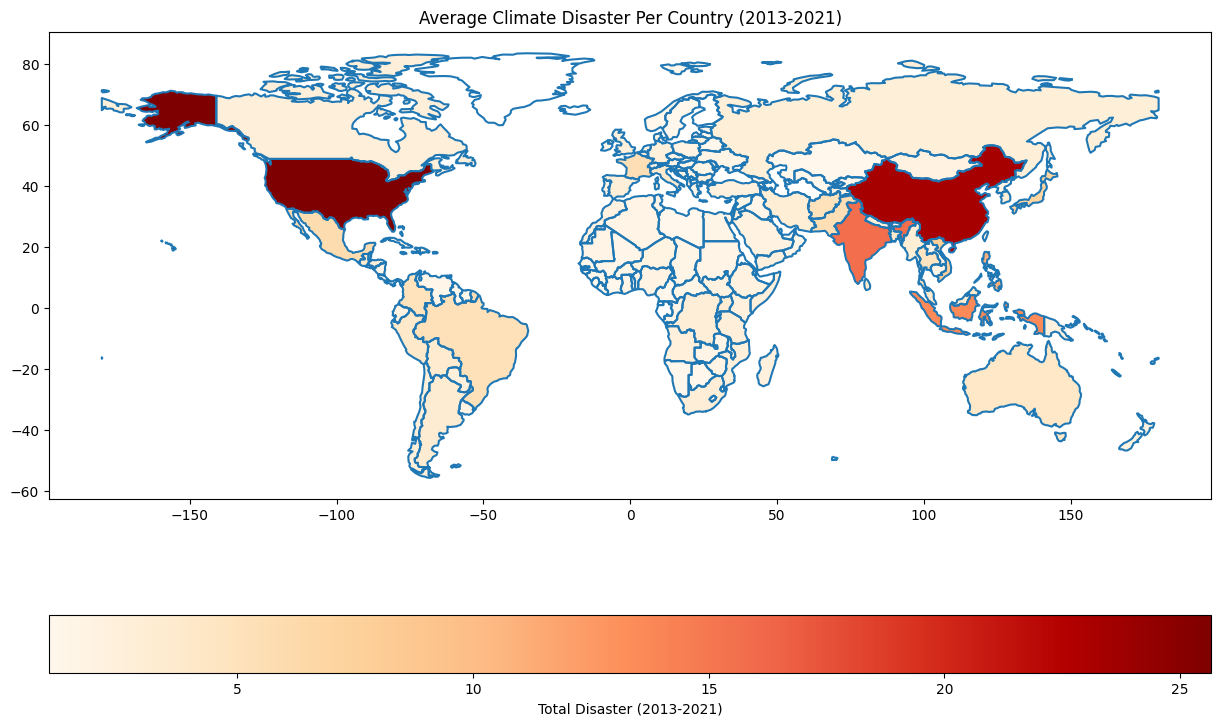

In [57]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica")]
# world = world.rename(columns={"iso_a3": "ISO3"})
world = world.merge(average_dis_per_country, how='left', left_on='iso_a3', right_on='ISO3')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax)
world.plot(column='Total_Disasters', ax=ax, legend=True,
           legend_kwds={'label': "Total Disaster (2013-2021)",
                        'orientation': "horizontal"}, cmap = 'OrRd',
        missing_kwds={"color": "white"},)
plt.title('Average Climate Disaster Per Country (2013-2021)')
plt.show()

Average Inform Risk Per Country

In [71]:
inform_risk_data = inform_risk[inform_risk['Indicator'] == 'Climate-driven INFORM Risk Indicator']

# Melt the DataFrame to have 'Year' as a variable
inform_risk_melted = inform_risk_data.melt(id_vars=['ISO3'], 
                               value_vars=['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], 
                               var_name='Year', value_name='Climate-driven INFORM Risk Indicator')

# Remove rows with missing values
# storm_melted.dropna(subset=['Storms'], inplace=True)

# Convert 'Year' to integer
inform_risk_melted['Year'] = inform_risk_melted['Year'].astype(int)

# Group by 'Country' and calculate the mean number of storms from 2013 to 2021
average_inform_risk_per_country = inform_risk_melted.groupby('ISO3')['Climate-driven INFORM Risk Indicator'].mean().reset_index()

# Rename the columns for clarity
average_inform_risk_per_country.columns = ['ISO3', 'Inform Risk']

# Print the results
print(average_inform_risk_per_country)


    ISO3  Inform Risk
0    AFG     7.188889
1    AGO     4.855556
2    ALB     3.144444
3    ARE     1.944444
4    ARG     3.033333
..   ...          ...
183  WSM     3.011111
184  YEM     5.833333
185  ZAF     4.900000
186  ZMB     5.033333
187  ZWE     6.033333

[188 rows x 2 columns]


C:\Users\BTC\AppData\Local\Temp\ipykernel_15468\2379395101.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


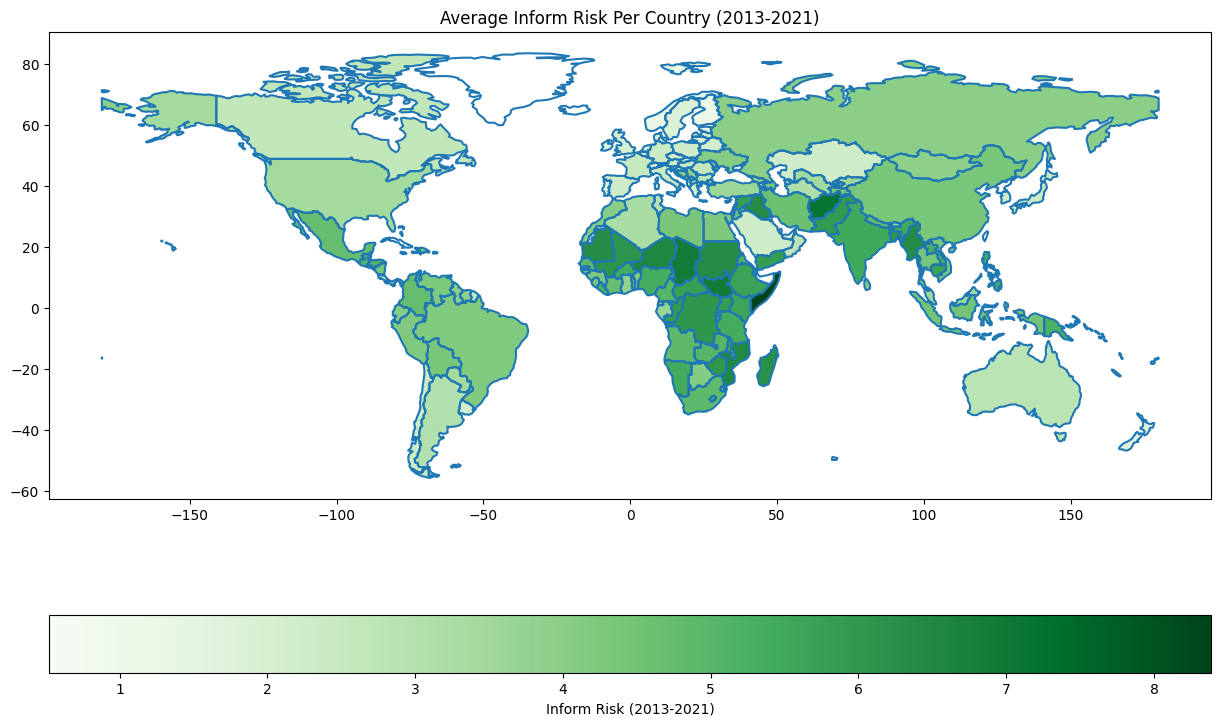

In [76]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica")]
# world = world.rename(columns={"iso_a3": "ISO3"})
world = world.merge(average_inform_risk_per_country, how='left', left_on='iso_a3', right_on='ISO3')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax)
world.plot(column='Inform Risk', ax=ax, legend=True,
           legend_kwds={'label': "Inform Risk (2013-2021)",
                        'orientation': "horizontal"}, cmap = 'Greens',
        missing_kwds={"color": "white"},)
plt.title('Average Inform Risk Per Country (2013-2021)')
plt.show()

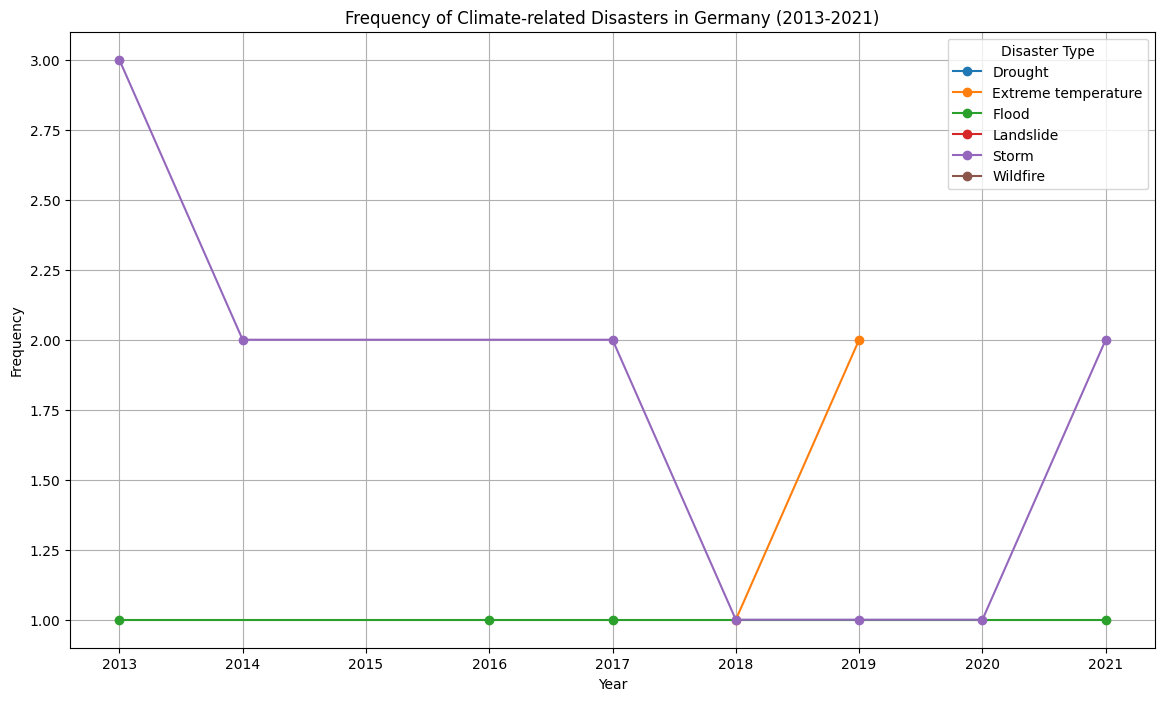

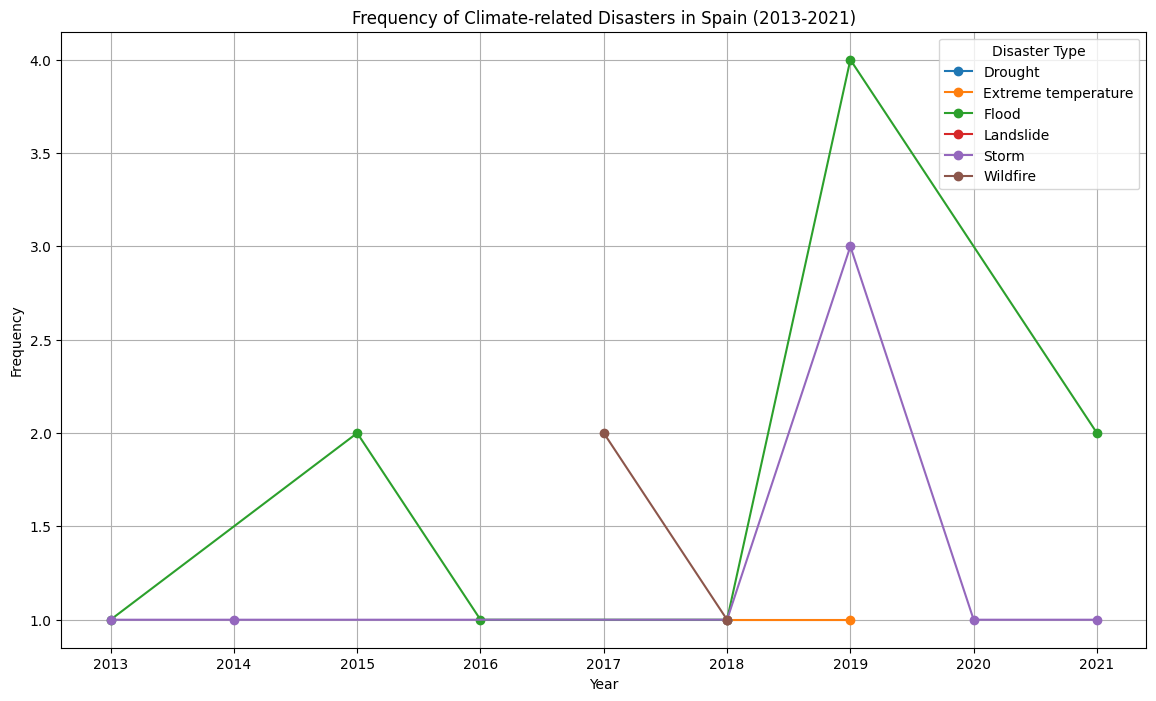

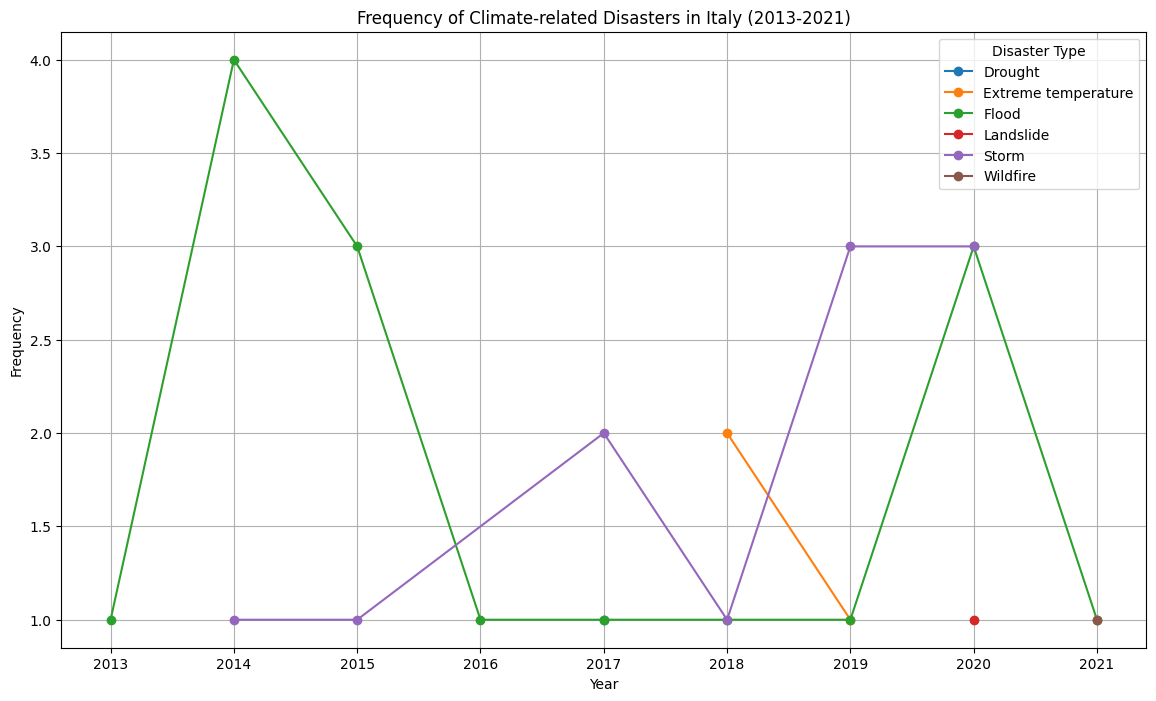

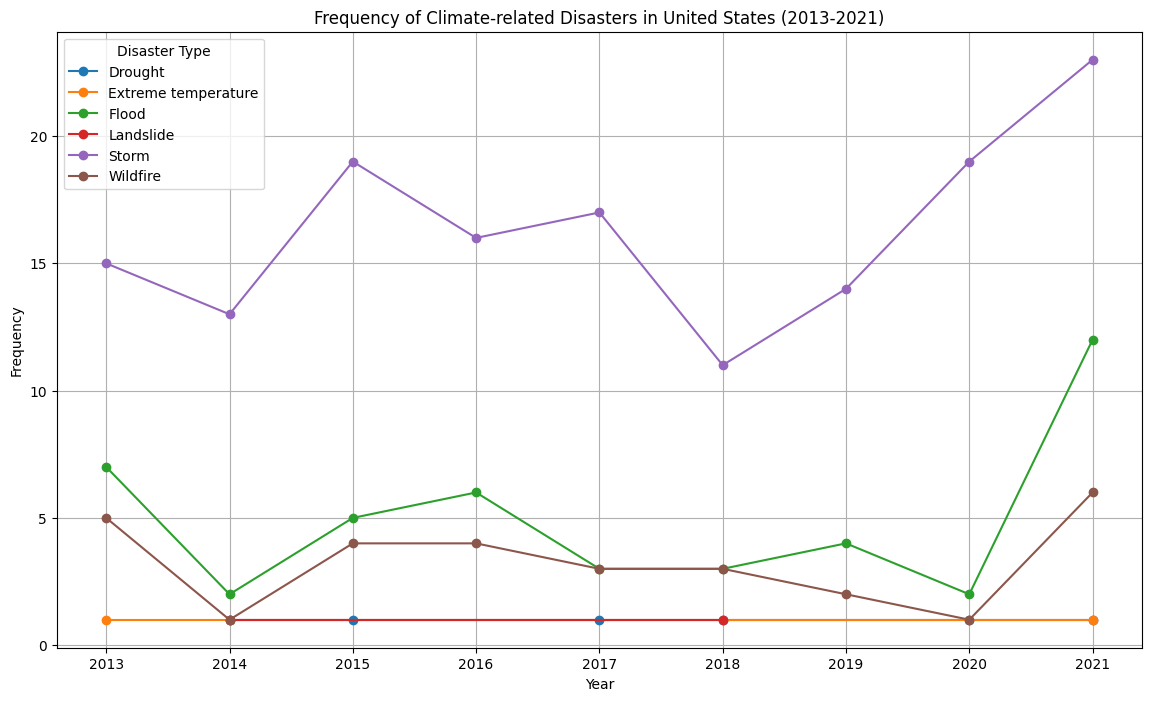

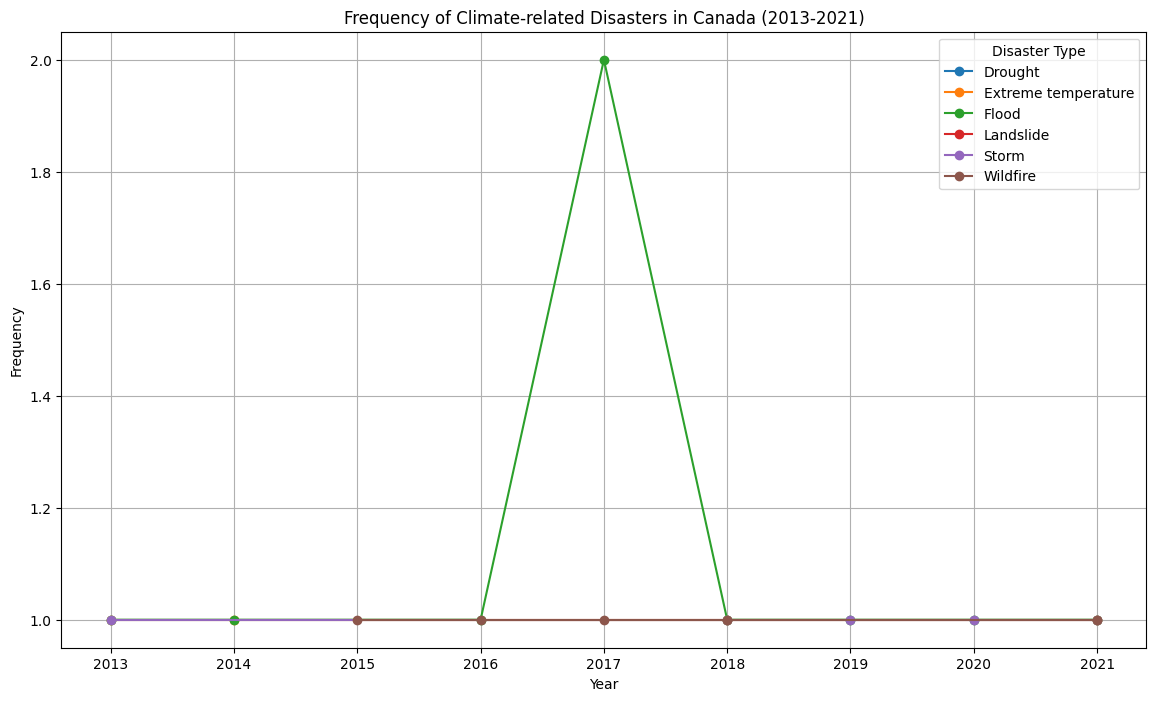

KeyError: 'Drought'

<Figure size 1400x800 with 0 Axes>

In [5]:
disaster_types = ['Drought', 'Extreme temperature', 'Flood', 'Landslide', 'Storm', 'Wildfire']
disaster_data = climate_disasters[climate_disasters['Indicator'].isin(disaster_types)]

disaster_data_melted = disaster_data.melt(
    id_vars=['Country', 'ISO3', 'Indicator'],
    value_vars=[str(year) for year in range(2013, 2022)],
    var_name='Year',
    value_name='Frequency'
)

disaster_data_melted.dropna(subset=['Frequency'], inplace=True)

# Convert 'Year' to integer
disaster_data_melted['Year'] = disaster_data_melted['Year'].astype(int)

countries = ['Germany', 'Spain', 'Italy', 'United States', 'Canada']

for country in countries:
    plt.figure(figsize=(14, 8))
    country_data = disaster_data_melted[disaster_data_melted['Country'] == country]
    for disaster in disaster_types:
        subset = country_data[country_data['Indicator'] == disaster]
        plt.plot(subset['Year'], subset['Frequency'], marker='o', label=disaster)

    plt.title(f'Frequency of Climate-related Disasters in {country} (2013-2021)')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.legend(title='Disaster Type')
    plt.grid(True)
    plt.show()

# Calculate the annual growth rate of each disaster type for each country
for country in countries:
    country_data = disaster_data_melted[disaster_data_melted['Country'] == country]
    annual_growth_rates = country_data.groupby(['Indicator', 'Year'])['Frequency'].sum().groupby(level=0).pct_change() * 100

    plt.figure(figsize=(14, 8))
    for disaster in disaster_types:
        growth_rate = annual_growth_rates.loc[disaster]
        plt.plot(growth_rate.index, growth_rate.values, marker='o', label=disaster)

    plt.title(f'Annual Growth Rate of Climate-related Disasters in {country} (2014-2021)')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.legend(title='Disaster Type')
    plt.grid(True)
    plt.show()

1. How has the frequency of climate-related disasters evolved globally over the years?

2013    296.0
2014    290.0
2015    354.0
2016    294.0
2017    315.0
2018    287.0
2019    361.0
2020    373.0
2021    391.0
dtype: float64


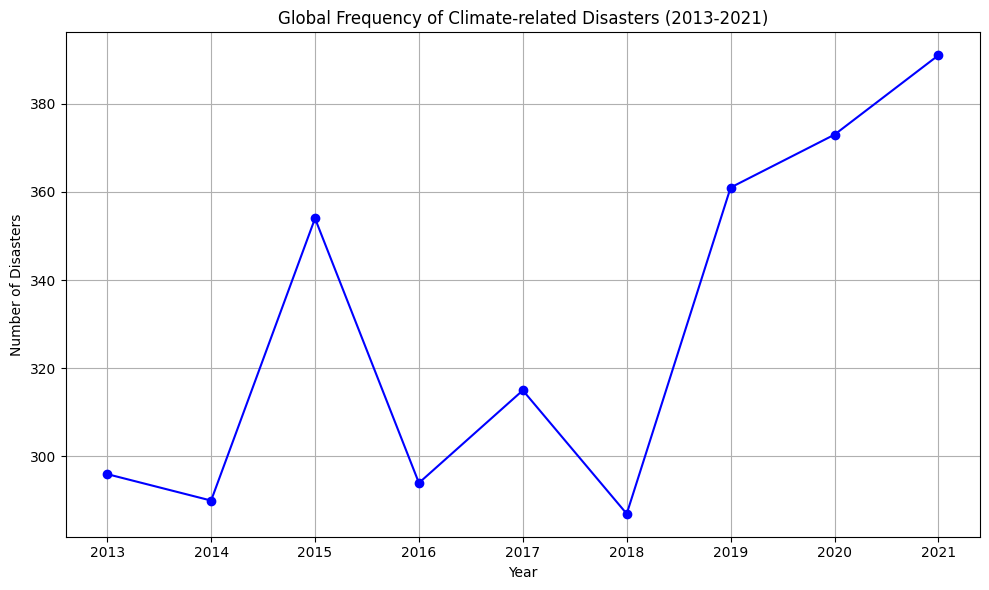

In [57]:
# Filter out 'TOTAL' indicator
total_disasters_data = climate_disasters[climate_disasters['Indicator'] != 'TOTAL']

# Sum the occurrences of disasters by year
disasters_by_year = total_disasters_data.loc[:, '2013':'2021'].sum()
print(disasters_by_year)

# Plotting the trend over the years
plt.figure(figsize=(10, 6))
disasters_by_year.plot(kind='line', marker='o', color='b')
plt.title('Global Frequency of Climate-related Disasters (2013-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.grid(True)
plt.tight_layout()
plt.show()

2. Which nations or regions experience particular kinds of climate-related disasters most frequently?

Top 5 Countries for Each Disaster Type:
        Country       Disaster_Type  Total
            USA               Storm  147.0
      Indonesia               Flood   99.0
          China               Storm   97.0
          China               Flood   86.0
    Philippines               Storm   71.0
          India               Flood   67.0
          India               Storm   49.0
            USA               Flood   44.0
          Japan               Storm   40.0
         Brazil               Flood   38.0
            USA            Wildfire   29.0
      Indonesia           Landslide   18.0
          China           Landslide   16.0
      Australia            Wildfire   12.0
          India           Landslide   11.0
    Afghanistan           Landslide   11.0
          India Extreme temperature   10.0
          Japan Extreme temperature   10.0
Myanmar (Burma)           Landslide    7.0
         France Extreme temperature    7.0
          China             Drought    7.0
        Belgiu

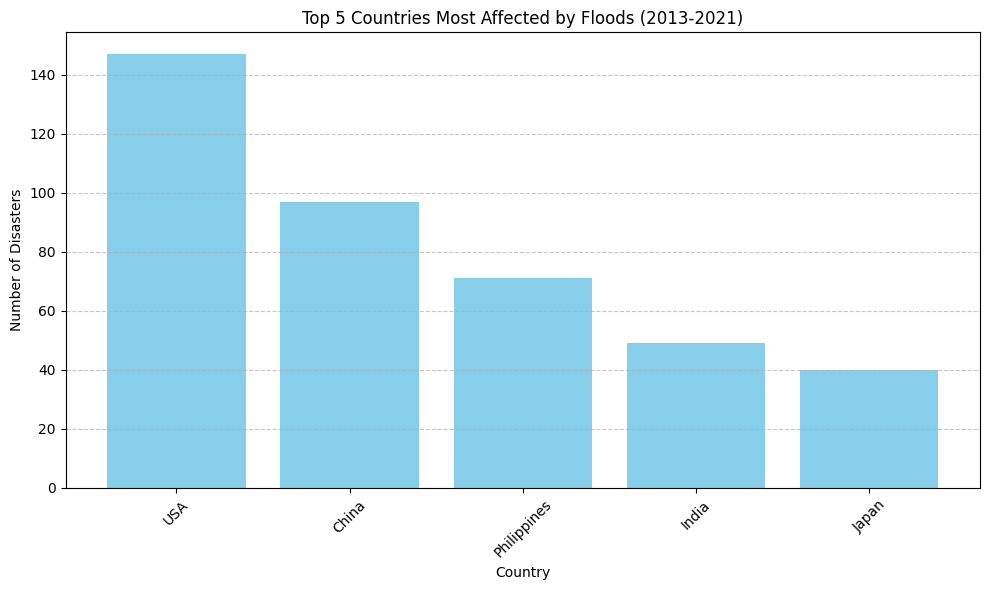

In [68]:
# Sum the occurrences of each disaster type by country
disasters_per_country = total_disasters_data.groupby(['Country', 'Indicator']).sum(numeric_only=True).loc[:, '2013':'2021'].sum(axis=1).reset_index()
disasters_per_country.columns = ['Country', 'Disaster_Type', 'Total']

# Find the top 5 countries for each disaster type
top_countries_per_disaster = disasters_per_country.sort_values(by='Total', ascending=False).groupby('Disaster_Type').head(5)

print("Top 5 Countries for Each Disaster Type:")
print(top_countries_per_disaster.to_string(index=False))

# Plotting (for example, Floods)
floods = top_countries_per_disaster[top_countries_per_disaster['Disaster_Type'] == 'Storm']
plt.figure(figsize=(10, 6))
plt.bar(floods['Country'], floods['Total'], color='skyblue')
plt.title('Top 5 Countries Most Affected by Floods (2013-2021)')
plt.xlabel('Country')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3. Do more severe climate disasters occur in nations with higher INFORM risk indicators?

INFORM Risk Indicators: ['Climate-driven Hazard & Exposure' 'Climate-driven INFORM Risk Indicator'
 'Lack of coping capacity' 'Vulnerability' None]
                       Country  Total_Disasters
0                  Afghanistan             45.0
1                      Albania              8.0
2                      Algeria              8.0
3               American Samoa              0.0
4                       Angola             19.0
..                         ...              ...
206  Wallis and Futuna Islands              0.0
207         West Bank and Gaza              5.0
208                      Yemen             18.0
209                     Zambia              8.0
210                   Zimbabwe             12.0

[211 rows x 2 columns]
                 Country  Average_Risk_Index
0            Afghanistan            7.188889
1                Albania            3.144444
2                Algeria            3.300000
3                 Angola            4.855556
4    Antigua and Barbuda   

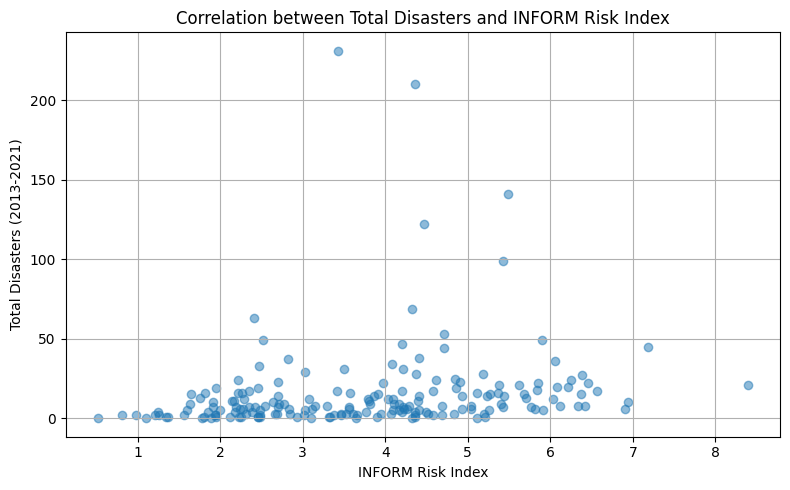

In [74]:

# Display the unique values in the 'Indicator' column of the inform_risk dataset
inform_risk_indicators = inform_risk['Indicator'].unique()
print("INFORM Risk Indicators:", inform_risk_indicators)

# Filter for the 'Climate-driven INFORM Risk Indicator' in the inform risk dataset
inform_risk_data = inform_risk[inform_risk['Indicator'] == 'Climate-driven INFORM Risk Indicator']

# Prepare the climate disaster data by summing the total disasters for each country
total_disasters_data = climate_disasters[climate_disasters['Indicator'] != 'TOTAL']
total_disasters_per_country = total_disasters_data.groupby('Country').sum(numeric_only=True).loc[:, '2013':'2021'].sum(axis=1).reset_index()
total_disasters_per_country.columns = ['Country', 'Total_Disasters']
print(total_disasters_per_country)

# Calculate the average risk index for each country
average_risk_index_per_country = inform_risk_data.groupby('Country').mean(numeric_only=True).loc[:, '2013':'2021'].mean(axis=1).reset_index()
average_risk_index_per_country.columns = ['Country', 'Average_Risk_Index']
print(average_risk_index_per_country)

# Merge the total disasters and average risk index data on Country
merged_data = pd.merge(total_disasters_per_country, average_risk_index_per_country, on='Country', how='inner')

# Compute the correlation
correlation = merged_data[['Total_Disasters', 'Average_Risk_Index']].corr().iloc[0, 1]
print(f"Correlation between total disasters and INFORM risk index: {correlation}")

# Plotting the correlation
plt.figure(figsize=(8, 5))
plt.scatter(merged_data['Average_Risk_Index'], merged_data['Total_Disasters'], alpha=0.5)
plt.title('Correlation between Total Disasters and INFORM Risk Index')
plt.xlabel('INFORM Risk Index')
plt.ylabel('Total Disasters (2013-2021)')
plt.grid(True)
plt.tight_layout()
plt.show()



Correlation for USA (2013-2021) between total disasters and INFORM risk index: -0.008625819491779497


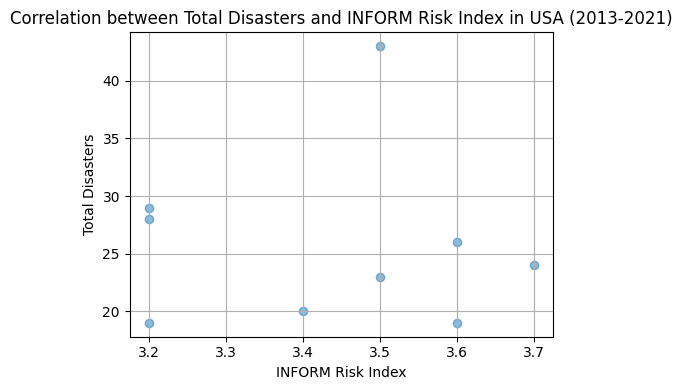

In [92]:
# Filter the data for the USA
climate_disasters_usa = climate_disasters[(climate_disasters['Country'] == 'USA') & (climate_disasters['Indicator'] != 'TOTAL')]
inform_risk_usa = inform_risk[(inform_risk['Country'] == 'USA') & (inform_risk['Indicator'] == 'Climate-driven INFORM Risk Indicator')]

# Sum the occurrences of disasters by year for the USA
total_disasters_usa = climate_disasters_usa.loc[:, '2013':'2021'].sum().reset_index()
total_disasters_usa.columns = ['Year', 'Total_Disasters']

# Extract the corresponding INFORM risk index for each year for the USA
inform_risk_usa = inform_risk_usa.set_index('Country').T
inform_risk_usa = inform_risk_usa.loc['2013':'2021'].reset_index()
inform_risk_usa.columns = ['Year', 'INFORM_Risk_Index']

# Ensure the 'Year' column is of type string to match during merge
total_disasters_usa['Year'] = total_disasters_usa['Year'].astype(str)
inform_risk_usa['Year'] = inform_risk_usa['Year'].astype(str)

# Merge the two datasets by year
merged_usa_data = pd.merge(total_disasters_usa, inform_risk_usa, on='Year')

# Calculate the correlation for the USA
print()
correlation_usa = merged_usa_data[['Total_Disasters', 'INFORM_Risk_Index']].corr().iloc[0, 1]
print(f"Correlation for USA (2013-2021) between total disasters and INFORM risk index: {correlation_usa}")

# Plotting the scatter plot with regression line using Matplotlib
plt.figure(figsize=(5, 4))
plt.scatter(merged_usa_data['INFORM_Risk_Index'], merged_usa_data['Total_Disasters'], alpha=0.5)
plt.title('Correlation between Total Disasters and INFORM Risk Index in USA (2013-2021)')
plt.xlabel('INFORM Risk Index')
plt.ylabel('Total Disasters')
plt.grid(True)
plt.tight_layout()
plt.show()